<a href="https://colab.research.google.com/github/arwahh/Churn-modelling-Deep-learning-project-/blob/main/churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
uploaded= files.upload()


Saving Churn_Modelling.zip to Churn_Modelling.zip


In [8]:
!pip install tensorflow

In [9]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [10]:
## import some basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [11]:
import zipfile

# Unzip the uploaded file
with zipfile.ZipFile("Churn_Modelling.zip", 'r') as zip_ref:
    zip_ref.extractall()

# Assuming the CSV file inside is named 'churn_modelling.csv' after extraction
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
## divide the dataset into dependent and independent feature
X= df.iloc[:,3:13]
y=df.iloc[:,13]

In [13]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [14]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [15]:
##featuring engineering
Geography= pd.get_dummies(X["Geography"],drop_first=True)
gender= pd.get_dummies(X["Gender"],drop_first=True)

In [16]:
##concatenate these variables with dataframe
X = X.drop(columns=["Geography", "Gender"])

In [17]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [18]:
X= pd.concat([X, Geography, gender], axis=1)

In [19]:
#Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X, y, test_size=0.2,random_state=0)

In [20]:
# feature scalling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [21]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [22]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [23]:
X_train.shape

(8000, 11)

In [24]:
#now lets create ANN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU, ReLU
from tensorflow.keras.layers import Dropout



In [25]:
# lets initialize the ANN
classifier=Sequential()

In [26]:
# adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [27]:
## adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [28]:
# adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [29]:
## adiing the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [30]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [32]:
# early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [33]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5549 - loss: 0.6740 - val_accuracy: 0.7955 - val_loss: 0.4819
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8100 - loss: 0.4404 - val_accuracy: 0.8171 - val_loss: 0.4171
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8243 - loss: 0.4021 - val_accuracy: 0.8311 - val_loss: 0.3879
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8447 - loss: 0.3615 - val_accuracy: 0.8383 - val_loss: 0.3782
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8380 - loss: 0.3726 - val_accuracy: 0.8410 - val_loss: 0.3742
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8495 - loss: 0.3564 - val_accuracy: 0.8429 - val_loss: 0.3743
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8520 - loss: 0.3439 - val_accuracy: 0.8410 - val_loss: 0.3749
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8515 - loss: 0.3487 - 

In [34]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

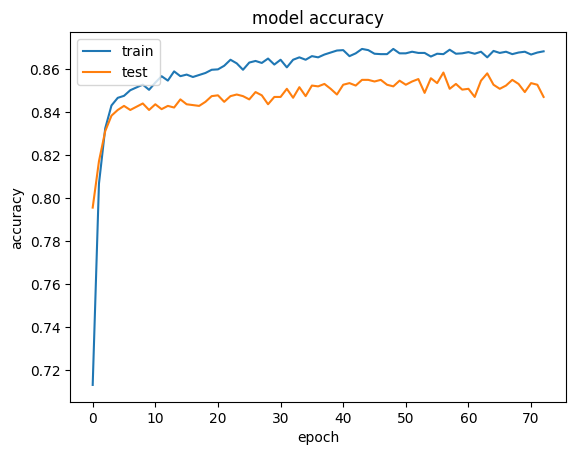

In [35]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

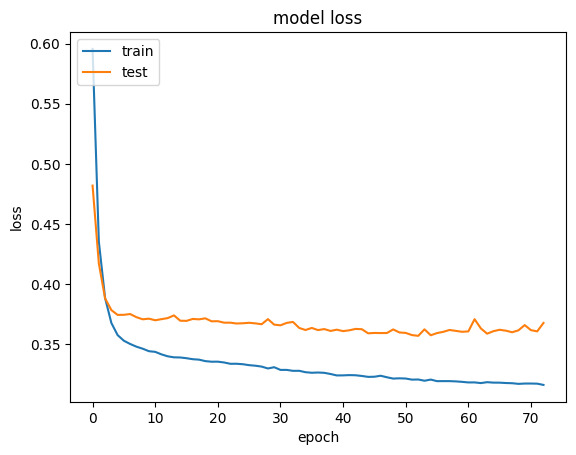

In [36]:
# summarize the history loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [37]:
# making the prediction and evaluating the model
# predicting the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [41]:
## make the cinfusuin matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm

array([[1465,  130],
       [ 180,  225]])

In [44]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test,y_pred)
score

0.845

In [45]:
## GET THE WEIGHTS
classifier.get_weights()

[array([[ 0.09380039, -0.17542925,  0.32245314,  0.48914844, -0.17471476,
          0.19487967, -0.00300031,  0.02160278, -0.12917995, -0.01828729,
         -0.4003839 ],
        [ 0.06626754,  0.34604484, -0.02585297, -0.82376915, -0.09982096,
         -0.57763314, -0.15901959,  0.6083019 , -0.40018332,  0.746826  ,
         -0.36619383],
        [-0.28691003,  0.11246825,  0.03568745,  0.1274344 ,  0.01366767,
          0.03527346, -0.00660894, -0.06831433, -0.00858078, -0.06151811,
          0.20695058],
        [ 0.5265132 , -0.24631654, -0.71305835,  0.16638298,  0.79805404,
          0.02153786,  0.2994781 ,  0.12747742,  0.56728023, -0.07753838,
         -0.7305609 ],
        [ 0.7309132 ,  0.1597379 , -0.5559441 , -0.19857146, -0.57992345,
          0.6010381 ,  1.0737495 , -0.8337567 , -0.3958289 ,  1.0933272 ,
         -0.23732796],
        [-0.49376765,  0.02014972, -0.20590726, -0.06397748,  0.02299382,
         -0.10386535, -0.06747692,  0.0288499 , -0.18026975, -0.0708938